## Integrating different data sets

It is often the case that we are confronted with multiple data sets from different sources, and need to bring them together so that we can operate on that larger collection of data.  Pandas provides a variety of mechanisms for such integration &mdash; including merging, joining, and concatenation, as described in more detail [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).  We will explore one such approach here, namely concatenation.  Often associated with such a process are various sorts of data manipulations required to get the final, aggregrated data into a useful form for further analysis.

We'll first explore the multiyear sales data that we have examined previously in the video, diving into the code and data in some greater detail.

In [1]:
# First, let's do some imports and configuration
import pandas as pd
%matplotlib inline

### Step 1.

We can see by inspecting the contents of the sales_directory that we have salesdata from 2000 through 2017, one file for each year.  Execute the code cell below, and examine the output.

In [2]:
# examine contents of sales_directory
%ls sales_directory

salesdata_2000.csv  salesdata_2005.csv  salesdata_2010.csv  salesdata_2015.csv
salesdata_2001.csv  salesdata_2006.csv  salesdata_2011.csv  salesdata_2016.csv
salesdata_2002.csv  salesdata_2007.csv  salesdata_2012.csv  salesdata_2017.csv
salesdata_2003.csv  salesdata_2008.csv  salesdata_2013.csv
salesdata_2004.csv  salesdata_2009.csv  salesdata_2014.csv


We previously showed in a video a function that executed a number of steps in order to read in each of these datafiles and stores them as dataframes in a dictionary containing the entire group.  

Let's revisit that function, presented in the code cell below.  Execute the code cell, and then we'll examine what's going on in a bit more detail below.

In [3]:
import glob

def read_multiyear_sales_data(directory):
    sales = {}
    # get names of all files matching this name
    salesfiles = glob.glob(directory + '/sales*.csv')
    for filename in salesfiles:
        # parse year from filename
        stop = filename.find('.csv')
        start = stop-4 
        year = filename[start:stop]
        # read in dataframe for this year
        df = pd.read_csv(filename, index_col='Month')
        # store dataframe in a dictionary
        sales[year] = df
    return sales

sales_by_year = read_multiyear_sales_data('sales_directory')

The function defined, ```read_multiyear_sales_data```, reads all the salesdata csv files in a specified directory, through the following steps:

1. initialize an empty dictionary (```sales```)
2. get the names of all files of interest (```salesfiles```)
3. extract the year from the filename (```year```)
4. read in the dataframe for that year (```df```)
5. store the dataframe in the ```sales``` dictionary as the value paired to the year 
6. return filled dictionary

We will examine some of these steps in more detail below.

### Step 2.

The ```glob``` module in the Python standard library provides the ability to list all the files whose filenames match some specified form, where we can specify wildcard characters that can match multiple filenames.  The key function is ```glob.glob```.

In the code cell below, import the glob module, and then assign to the variable ```salesfiles``` all those files in the sales_directory that have a name of the form ```salesdata*.csv```, where ```*``` can represent any sequence of characters (including none at all).

After you have assigned to ```salesfiles```, print out that variable.  You should notice that salesfiles is a Python list, containing a sequence of strings.  You might also notice that the list does not necessarily contain strings in their natural chronological order (i.e., from 2000 to 2017). ```glob.glob``` does not guarantee any particular ordering, so if we want some particular ordering, we need to carry that out explicitly, as discussed further down in this exercise.

In [4]:
salesfiles = glob.glob('sales_directory/salesdata*.csv')
print(salesfiles)

['sales_directory/salesdata_2007.csv', 'sales_directory/salesdata_2005.csv', 'sales_directory/salesdata_2014.csv', 'sales_directory/salesdata_2003.csv', 'sales_directory/salesdata_2006.csv', 'sales_directory/salesdata_2001.csv', 'sales_directory/salesdata_2017.csv', 'sales_directory/salesdata_2011.csv', 'sales_directory/salesdata_2016.csv', 'sales_directory/salesdata_2010.csv', 'sales_directory/salesdata_2008.csv', 'sales_directory/salesdata_2015.csv', 'sales_directory/salesdata_2004.csv', 'sales_directory/salesdata_2009.csv', 'sales_directory/salesdata_2012.csv', 'sales_directory/salesdata_2002.csv', 'sales_directory/salesdata_2013.csv', 'sales_directory/salesdata_2000.csv']


### Step 3.

Let's say you were only interested in sales data going back to 2010 (i.e., 2010-2017).  In the code cell below, write an expression that uses ```glob.glob``` to return the set of filenames just for those years, and assign the result to the variable ```sales2010s_files```.  Print the value of ```sales2010s_files```.

## Graded Cell

This cell is worth 25% of the grade for this assignment.

In [5]:
sales2010s_files = glob.glob('sales_directory/salesdata_201[0-7].csv')
print(sales2010s_files)

['sales_directory/salesdata_2014.csv', 'sales_directory/salesdata_2017.csv', 'sales_directory/salesdata_2011.csv', 'sales_directory/salesdata_2016.csv', 'sales_directory/salesdata_2010.csv', 'sales_directory/salesdata_2015.csv', 'sales_directory/salesdata_2012.csv', 'sales_directory/salesdata_2013.csv']


## Self-Check

Run the cell below to test the correctness of your code above before submitting for grading.

In [6]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testFileNames

try:
    print(testFileNames(sales2010s_files))    
except Exception as e:
    print("Error!\n" + str(e))
    

Correct!


### Step 4.

The function ```read_multiyear_sales_data``` contains a few lines dedicated to extracting the year of a particular filename from the name of the file.  Manipulations of this sort &mdash; small bits of code to extract some useful metadata &mdash; are common in a variety of data science applications.  Let's examine that code in some more detail.  The code in question reads as follows:

<pre>
# parse year from filename
stop = filename.find('.csv')
start = stop-4
year = filename[start:stop]
</pre>

The variable ```filename``` changes each time through the for loop (```for filename in salesfiles:```), acquiring successive values of strings contained in ```salesfiles```.  In the code presented below, we won't iterate through all filenames, but just consider one particular file in the loop (e.g., 'sales_directory/salesdata_2010.csv'), setting filename to that string.

The variable filename is assigned to a string, so the expression ```filename.find('.csv')``` is a call to the ```find``` method on a string object.  We are doing this so that we can locate the correct position in the string from which to extract the year information &mdash; the expression ```filename.find('.csv')``` returns the position of the string ```'.csv'``` within the larger string ```filename```.  You can understand this by calling up the documentation on this method by executing the code cell below -- the documentation should appear in a small panel near the bottom of this page.  Once you are done reading the documentation, you can close the small panel by clicking on the "X" in the upper right corner of the panel.

In [7]:
str.find?

Execute the code cell below and examine the printed output.  Then proceed.

In [8]:
# parse year from filename
filename = 'sales_directory/salesdata_2010.csv'
stop = filename.find('.csv')
start = stop-4
year = filename[start:stop]

print(start, stop, year)

26 30 2010


### Step 5.

Imagine instead that the filenames in the sales_directory had a different naming convention, e.g., 'year_2010_salesdata.csv','year_2011_salesdata.csv', etc.  In the code cell below, write new code to extract the year from the filename, and print the values of ```start```, ```stop```, and ```year```.  There is more than one correct way to solve this problem, but you'll want to verify that the values are correct regardless the specific approach you use. To be specific about the filename you are trying to parse, begin the code cell below by defining <code>filename = 'sales_directory/year_2012_salesdata.csv'</code>.



## Graded Cell

This cell is worth 25% of the grade for this assignment.

In [9]:
filename = 'sales_directory/year_2012_salesdata.csv'
parts = filename.split('_')
start = len(parts[0])+1+len(parts[1])+1
stop = start+4
year = parts[2]

## Self-Check

Run the cell below to test the correctness of your code above before submitting for grading.

In [10]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testExtractingFilename

try:
    print(testExtractingFilename(filename, start, stop, year))    
except Exception as e:
    print("Error!\n" + str(e))
    

Correct!


### Step 6.

We also previously showed in a video a function that executed a number of steps in order to convert the separate dataframes stored in the sales dictionary created above into one big dataframe, using the concatenation capabilities of pandas (```pd.concat```).  

Let's revisit a slightly revised version of that function, presented in the code cell below.

Execute the code cell, and then we'll examine what's going on in a bit more detail below.

In [11]:
def make_dataframe_from_sales_data(sales):
    # concatentate sales data 
    df = pd.concat(sales, axis=0, keys=sorted(sales.keys()), names=['Year', 'Month'])
    # convert month strings to numbers
    lookup = {'Jan': '01', 'Feb': '02', 'Mar': '03',
                  'Apr': '04', 'May': '05', 'Jun': '06',
                  'Jul': '07', 'Aug': '08', 'Sep': '09',
                  'Oct': '10', 'Nov': '11', 'Dec': '12'}
    df = df.rename(index=lookup)
    # convert the (year, month) MultiIndex to a 'year-month' index
    df.index = ["-".join(x) for x in df.index.ravel()]
    # convert the 'year-month' strings to datetime objects
    df.index = pd.to_datetime(df.index)
    return df

sales_df = make_dataframe_from_sales_data(sales_by_year)

The function defined, ```make_dataframe_from_sales_data```, converts the multiple sales dataframes into one big dataframe through the following sequence of steps:
1. concatenate the separate dataframes in the sales dictionary into a new dataframe (```df```)
2. rename the index of the dataframe ```df``` so that month abbreviation strings are converted to number strings
3. reconfigure the index of the dataframe ```df``` so that each index label is a combined "year-month" string (e.g., "2010-07")
4. convert the index of the dataframe ```df``` to consist of datetime objects (timestamps) for further processing

We'll go through these steps in more detail below, but let's first have a peek at which the ```sales_by_year``` dictionary looks like so that we can better understand the operations on it.  Execute the code cell below to first print the keys of the dictionary, and then to print the values associated with one of those keys.  Each of the keys is a year, and each of the values are the sales data for that year.

In [12]:
print(sales_by_year.keys())
print(sales_by_year['2010'])

dict_keys(['2007', '2005', '2014', '2003', '2006', '2001', '2017', '2011', '2016', '2010', '2008', '2015', '2004', '2009', '2012', '2002', '2013', '2000'])
       Pens  Pencils  Erasers  Paper
Month                               
Jan     596      656       85    585
Feb     493      444      213    546
Mar     372      430      140    364
Apr     209      357      107    301
May     274      383      141    281
Jun     251      353       93    291
Jul     162      170       83    222
Aug     554      692      155    608
Sep     508      655      288    640
Oct     282      342      192    463
Nov     234      210      126    317
Dec     147      193      164    199


### Step 7.

The first step of the function above does the following:

<pre>
df = pd.concat(sales, axis=0, keys=sorted(sales.keys()), names=['Year', 'Month'])
</pre>

The first argument in the call to ```pd.concat``` is a dictionary that maps year names to associated dataframes. The name for that dictionary internal to the function is ```sales```, and of course we are free to name it whatever we want inside the function.  When we called our ```make_dataframe_from_sales_data``` function above, we passed in the dictionary that we had computed named ```sales_by_year```.

Each separate dataframe consists of a sequence of rows, one for each month of the year, and we want to concatenate each of those rows, one after the other.  Therefore, we want to concatenate row-wise, or along ```axis=0```, which is the second argument passed to the ```concat``` function.

We observed previously that the dictionary keys were not in chronological or lexographical order, but we would like our new dataframe to progress chronologically from 2001 through 2017.  We can accomplish this by sorting the dictionary keys as part of the concatenation process, as is indicated in the third argument passed to the ```concat``` function.

The last argument passed to the ```concat``` function reads ```names=['Year', 'Month']```, which is just a way of indicating what we want to call the index of the new concatenated dataframe.  The role of these names will become more apparent below.

Execute the following code cells below, so that you can create a concatenated dataframe and then examine its contents and summary information.  As noted, internally the function refers to the dictionary as ```sales```, which acquires its value when we pass an argument to the function.  But the object ```sales``` does not currently exist in this notebook, so we can create it by assigning it to the ```sales_by_year``` dictionary that we created previously.

In [13]:
sales = sales_by_year
df = pd.concat(sales, axis=0, keys=sorted(sales.keys()), names=['Year', 'Month'])

In [14]:
df

Pens  Pencils  Erasers  Paper
Year Month                               
2000 Jan     429      566       80    494
     Feb     373      430       84    468
     Mar     262      322       23    279
     Apr     168      243       37    220
     May     219      268       37    250
...          ...      ...      ...    ...
2017 Aug     595      702      153    690
     Sep     607      700      322    688
     Oct     372      409      264    481
     Nov     282      301      223    351
     Dec     162      289      197    249

[216 rows x 4 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 216 entries, ('2000', 'Jan') to ('2017', 'Dec')
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Pens     216 non-null    int64
 1   Pencils  216 non-null    int64
 2   Erasers  216 non-null    int64
 3   Paper    216 non-null    int64
dtypes: int64(4)
memory usage: 7.5+ KB


### Step 8.

You can see from the summary information printed above that the index of the dataframe ```df``` is a MultiIndex, also known as a hierarchical index.  (These are described in more detail [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html).)  This is because there are two pieces of information that are being used to index each row, the Year and the Month.  That information is organized hierarchically: for each Year (first level of MultiIndex), there are 12 Months (second level of the MultiIndex).  Together the Year and Month make up a multilevel index for each row.

In the code cell below, print the index of the dataframe to examine its contents.

In [16]:
print(df.index)

MultiIndex([('2000', 'Jan'),
            ('2000', 'Feb'),
            ('2000', 'Mar'),
            ('2000', 'Apr'),
            ('2000', 'May'),
            ('2000', 'Jun'),
            ('2000', 'Jul'),
            ('2000', 'Aug'),
            ('2000', 'Sep'),
            ('2000', 'Oct'),
            ...
            ('2017', 'Mar'),
            ('2017', 'Apr'),
            ('2017', 'May'),
            ('2017', 'Jun'),
            ('2017', 'Jul'),
            ('2017', 'Aug'),
            ('2017', 'Sep'),
            ('2017', 'Oct'),
            ('2017', 'Nov'),
            ('2017', 'Dec')],
           names=['Year', 'Month'], length=216)


### Step 9.

Ultimately, we want convert this Year-Month MultiIndex into a single-level index composed of dates (i.e., datetime objects), since Pandas can then make better use of that information.  The somewhat obscure code in our function definition does that in a series of steps:

<pre>
    # convert month strings to numbers
    lookup = {'Jan': '01', 'Feb': '02', 'Mar': '03',
              'Apr': '04', 'May': '05', 'Jun': '06',
              'Jul': '07', 'Aug': '08', 'Sep': '09',
              'Oct': '10', 'Nov': '11', 'Dec': '12'}
    df = df.rename(index=lookup)

    # convert the (year, month) MultiIndex to a 'year-month' index
    df.index = ["-".join(x) for x in df.index.ravel()]

    # convert the 'year-month' strings to datetime objects
    df.index = pd.to_datetime(df.index)
</pre>

As noted, these steps do the following:
* rename the index of the dataframe ```df``` so that month abbreviation strings are converted to number strings
* reconfigure the index of the dataframe ```df``` so that each index label is a combined "year-month" string (e.g., "2010-07")
* convert the index of the dataframe ```df``` to consist of datetime objects (timestamps) for further processing

Each of these steps is broken out in successive code cells.  Execute each cell in turn, and print the dataframe index after each transformation so that you can understand the transformation that is taking place.  If necessary, look up available documentation on what the various pieces do (e.g., ```df.rename```, ```"-".join```, ```pd.to_datetime```).

In [17]:
# convert month strings to numbers
lookup = {'Jan': '01', 'Feb': '02', 'Mar': '03',
              'Apr': '04', 'May': '05', 'Jun': '06',
              'Jul': '07', 'Aug': '08', 'Sep': '09',
              'Oct': '10', 'Nov': '11', 'Dec': '12'}
df = df.rename(index=lookup)

In [18]:
# convert the (year, month) MultiIndex to a 'year-month' index
df.index = ["-".join(x) for x in df.index.ravel()]

In [19]:
# convert the 'year-month' strings to datetime objects
df.index = pd.to_datetime(df.index)

Examine the resulting dataframe and print its summary information to verify that the data have been processed into a suitable format.

In [20]:
df

,Pens,Pencils,Erasers,Paper
2000-01-01,429,566,80,494
2000-02-01,373,430,84,468
2000-03-01,262,322,23,279
2000-04-01,168,243,37,220
2000-05-01,219,268,37,250
...,...,...,...,...
2017-08-01,595,702,153,690
2017-09-01,607,700,322,688
2017-10-01,372,409,264,481
2017-11-01,282,301,223,351


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 216 entries, 2000-01-01 to 2017-12-01
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Pens     216 non-null    int64
 1   Pencils  216 non-null    int64
 2   Erasers  216 non-null    int64
 3   Paper    216 non-null    int64
dtypes: int64(4)
memory usage: 8.4 KB


### Step 10.

Now that the sales data have all been integrated into one big, chronologically ordered dataframe, we can examine it to look for temporal trends.

Let's first plot the data, which is something we also did in the video.  In the code cell below, plot the sales data in the dataframe using its ```plot``` method.  You should be able to observe substantial seasonal variation throughout each year.

## Graded Cell

This cell is worth 25% of the grade for this assignment. <i>Note: a self-check will not accompany this assignment</i><br>
Your plot should look like this: <br><img src="IntegratingDSStep10.png" width=400 height=400  align="left"/>

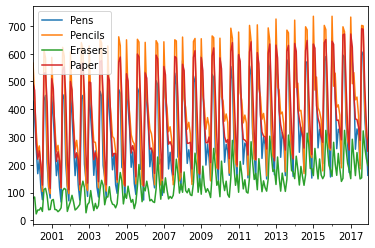

In [22]:
df.plot()

### Step 11.

While the detailed data represented in the plot of the dataframe is useful, the within-year seasonal variation makes it more difficult to discern longer timescale trends.  Fortunately, having gone through the trouble to convert the (Year, Month) data to proper datetime objects, Pandas is now able to operate on that information.

In the video, we demonstrated the code shown in the cell below.  Execute the code cell below and inspect the resulting plot.

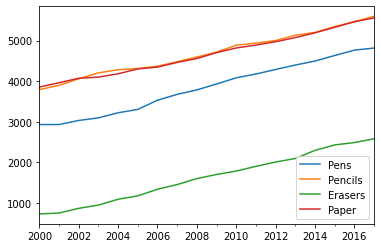

In [23]:
df.resample('Y').sum().plot()

The code above computes and plots the total amount of sales of each item type <i>per year</i>.  The raw data in the dataframe represents sales per month, but we can <i>resample</i> along the time axis, at a different frequency.  The argument to the ```resample``` method in the code above is 'Y', which instructs the method to resample at the time scale of a year.  Other frequencies (referred to as "offset aliases") are possible with other values of that argument, as described in [this documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).

Resampling is similar to a groupby operation, in that rows in a dataframe are split into subgroups (based on the sampling frequency), such that an aggregating function can be applied to each subgroup.  In the plot above, the aggregating function we used was ```sum```, since we were interested in computing the total number of sales in each product category over each year.

In the code cell below, write an expression to compute and plot the mean sales in each product category over each quarter of the year (aligned with the end of each calendar quarter).  Consult the link provided above to determine the appropriate string alias to resample over quarters instead of years.

## Graded Cell

This cell is worth 25% of the grade for this assignment. <i>Note: a self-check will not accompany this assignment</i><br>
Your plot should look like this: <br><img src="IntegratingDSStep11.png" width=400 height=400  align="left"/>

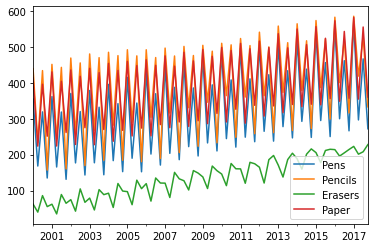

In [24]:
df.resample('Q').mean().plot()